<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Data_Exploration_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration - Pandas
- Pandas is a package build on top of NumPy, for effiecient implementation of series and DataFrames
- DataFrames = multidimentional arrays with attached row and column labels, ofter with hetergenous types and/or missing data.
- uses both database frameworks and spreadsheet programs.
- provides efficient access to data munging tasks.
- pandas series is one dimentional array of indexed data.
- `NumPy` has `IMPLICITLY` defined integer index to access values while `Pandas` has `EXPLICITYL` defined index asscociated with values
- Data can be dictionary, in which index defaults to the sorted dictionary keys.
- when slicing with `explicit index` (data['a':'b']), final index is `Included`
- when slicing with `implicit index` (data[0:2]), final index is `not included`
- *Indexer attributes* = explicity expose certain indexing schemas
- DataFrames are sequence of aligned Series object, `aligned` = they share same index.
- DataFrames can be constructed from a single series or multiple series object
- indexing referes to columns, slicing refers to rows

In [20]:
import pandas as pd
data = pd.Series([1,3,5,4])
data

0    1
1    3
2    5
3    4
dtype: int64

In [21]:
# access pandas series
data[1]

3

In [22]:
data[1:3]

1    3
2    5
dtype: int64

In [23]:
data = pd.Series([1,3,4,5], index = ['a','b','c','d']) # explicit indexing
data

a    1
b    3
c    4
d    5
dtype: int64

In [24]:
data = pd.Series([2,3,5,9], index = [2,5,2,5]) # noncontigous, nonsequenctial indices
data

2    2
5    3
2    5
5    9
dtype: int64

In [25]:
population_dict = {'cali' : 2333,
                    'tex' : 3335,
                    'flo':999,
                    'ill':444}
population = pd.Series(population_dict)
population

cali    2333
tex     3335
flo      999
ill      444
dtype: int64

In [26]:
data[2]

2    2
2    5
dtype: int64

In [27]:
population['cali']

2333

In [28]:
# slicing by explicit index
data[5:5]
population['cali':'ill']

cali    2333
tex     3335
flo      999
ill      444
dtype: int64

In [29]:
pd.Series({2:'a',1:'b',3:'C'})

2    a
1    b
3    C
dtype: object

In [30]:
# slicing by implicit integer index
data[0:2]

2    2
5    3
dtype: int64

In [31]:
# masking:
data[(data>2)&(data<5)]

5    3
dtype: int64

In [32]:
# fancy indexing:
data[[5,2]]

5    3
5    9
2    2
2    5
dtype: int64

In [33]:
# Indexers:
data = pd.Series(['a','b','c'],index=[1,2,3])
data

1    a
2    b
3    c
dtype: object

In [34]:
# explict index when indexing
data[1]

'a'

In [35]:
# implicit index when slicing
data[1:3]

2    b
3    c
dtype: object

In [36]:
# loc attribute: always reference explicit index
data.loc[1]

'a'

In [37]:
data.loc[1:3]

1    a
2    b
3    c
dtype: object

In [38]:
# iloc attribute: always indexing and slicing that always references implicit python style index
data.iloc[1]

'b'

In [39]:
data.iloc[1:3]

2    b
3    c
dtype: object

### DataFrames


In [40]:
pd.DataFrame(population,columns=['population']) # single series

,population
cali,2333
tex,3335
flo,999
ill,444


In [41]:
# multiple series dataframe
area_dict = {'cali': 88,
             'flo':99,
             'ill':00,
             'tex':66}
area_dict
area = pd.Series(area_dict)
states = pd.DataFrame({'population':population,'area': area})
states

,population,area
cali,2333,88
flo,999,99
ill,444,0
tex,3335,66


In [42]:
import numpy as np
pd.DataFrame(np.random.rand(3,2), columns = ['ffff','llll'], index = ['a','b','c'])

,ffff,llll
a,0.921126,0.392282
b,0.478875,0.179878
c,0.768300,0.224650


In [43]:
# df from array
array_2d = np.array([[1,3,4],[4,5,5],[2,35,8]])
pd.DataFrame(array_2d, columns = ['col1','col2','col3'],index = ['rr','ss','mm'])

,col1,col2,col3
rr,1,3,4
ss,4,5,5
mm,2,35,8


In [44]:
# df from dictionary
data1 = {
    'calories':[44, 6, 6, 7],
    'duration':[5, 90, 22, 8]
    }
df = pd.DataFrame(data) # load data into df object
print(df)

   0
1  a
2  b
3  c


### Accessing Columns

In [45]:
data1['calories']

[44, 6, 6, 7]

In [46]:
# attribute style access
states.area

cali    88
flo     99
ill      0
tex     66
Name: area, dtype: int64

In [47]:
# Adding & removing columns from data frame
df = pd.DataFrame(np.random.rand(3,2), columns = ['A','B'], index = ['a','b','c'])
print('adding column')
df['C'] = [1,3,5]
print(df)
print('droping columns')
df1 = df.drop('A', axis = 1) # axis = 1 = columns
print(df1)
print('dropping rows')
df2 = df.drop('a', axis = 0) # axis = 0 = rows
print(df2)

adding column
          A         B  C
a  0.433093  0.973896  1
b  0.168544  0.743336  3
c  0.242609  0.510312  5
droping columns
          B  C
a  0.973896  1
b  0.743336  3
c  0.510312  5
dropping rows
          A         B  C
b  0.168544  0.743336  3
c  0.242609  0.510312  5


In [48]:
states['density']=states['population']/states['area']
states

,population,area,density
cali,2333,88,26.511364
flo,999,99,10.090909
ill,444,0,inf
tex,3335,66,50.530303


In [49]:
df

,A,B,C
a,0.433093,0.973896,1
b,0.168544,0.743336,3
c,0.242609,0.510312,5


In [50]:
df.A

a    0.433093
b    0.168544
c    0.242609
Name: A, dtype: float64

In [51]:
df.A = range(3)
df

,A,B,C
a,0,0.973896,1
b,1,0.743336,3
c,2,0.510312,5


In [52]:
# delete multiple row or columns
df.drop('A', axis = 1)

,B,C
a,0.973896,1
b,0.743336,3
c,0.510312,5


In [53]:
df.drop('b', axis = 0)

,A,B,C
a,0,0.973896,1
c,2,0.510312,5


In [68]:
df.drop(['a','c'], axis = 0)

,A,B,C
b,1,0.215771,3


### DataFrame Properties

In [71]:
df4 = pd.DataFrame(np.random.rand(3,3),columns = ['Product Name','Order Number','Total Quantity'], index = [0,1,2])
print(df4)

   Product Name  Order Number  Total Quantity
0      0.853401      0.042429        0.840893
1      0.709291      0.674377        0.162173
2      0.323792      0.761035        0.639547


In [72]:
# return head
df4.head(2)

,Product Name,Order Number,Total Quantity
0,0.853401,0.042429,0.840893
1,0.709291,0.674377,0.162173


In [74]:
# return tail
df4.tail(1)

,Product Name,Order Number,Total Quantity
2,0.323792,0.761035,0.639547


In [75]:
# return size = number of elemenst in dataframe
df4.size

9

In [77]:
# return shape
df4.shape

(3, 3)

In [78]:
# return length of df4 or number of rows in df
df4.shape[0]

3

In [79]:
# return length of df4 or number of columns in df
df4.shape[1]

3

In [81]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    3 non-null      float64
 1   Order Number    3 non-null      float64
 2   Total Quantity  3 non-null      float64
dtypes: float64(3)
memory usage: 96.0 bytes


In [82]:
df4.describe()

,Product Name,Order Number,Total Quantity
count,3.000000,3.000000,3.000000
mean,0.628828,0.492614,0.547538
std,0.273820,0.392272,0.348589
min,0.323792,0.042429,0.162173
25%,0.516541,0.358403,0.400860
50%,0.709291,0.674377,0.639547
75%,0.781346,0.717706,0.740220
max,0.853401,0.761035,0.840893


In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(3,2),index = ['1','2','3'])
print(df)
print(list(df.columns))
print(list(df.index))
print(list(df.columns)[0])

          0         1
1  0.028840  0.317972
2  0.025252  0.605631
3  0.611319  0.186487
[0, 1]
['1', '2', '3']
0


In [8]:
# accessing columns with integer names
df = pd.DataFrame(np.random.rand(3,2))
df.columns = df.columns.map(str)
print(df)
print(df['0'])
#print(df[0]) # key error


          0         1
0  0.487221  0.419083
1  0.000788  0.451958
2  0.231699  0.876919
0    0.487221
1    0.000788
2    0.231699
Name: 0, dtype: float64


In [9]:
# modify rows and columns names
df.columns = ['X','Y']
df

,X,Y
0,0.487221,0.419083
1,0.000788,0.451958
2,0.231699,0.876919


In [10]:
df.index = ['x','y','z']
df

,X,Y
x,0.487221,0.419083
y,0.000788,0.451958
z,0.231699,0.876919


In [13]:
# sorting by row and column names
df=pd.DataFrame([1,2,3,4,5], index = [100,20,343,1,150], columns = ['A'])
df.sort_index()

,A
1,4
20,2
100,1
150,5
343,3


In [14]:
df.sort_index(ascending=False)

,A
343,3
150,5
100,1
20,2
1,4


In [15]:
df.sort_index(axis = 1) # sorts whole column

,A
100,1
20,2
343,3
1,4
150,5


In [17]:
df1 = pd.DataFrame(np.random.rand(3,3), columns = ['A','B','C'], index = ['a','b','c'])
print(df1)
df1.sort_values('A', ascending=False)

          A         B         C
a  0.943828  0.180302  0.878147
b  0.455483  0.009929  0.253544
c  0.766768  0.580321  0.399750


,A,B,C
a,0.943828,0.180302,0.878147
c,0.766768,0.580321,0.399750
b,0.455483,0.009929,0.253544


### Slicing DataFrames

In [18]:
df.iloc[:3,:2]

,A
100,1
20,2
343,3


In [57]:
df.iloc[:1]

,A,B,C
a,0,0.973896,1


In [58]:
df.iloc[:1,:1]

,A
a,0


In [60]:
df.iloc[0,0] = 90
df

,A,B,C
a,90,0.973896,1
b,1,0.743336,3
c,2,0.510312,5


In [61]:
df = pd.DataFrame(np.random.rand(3,3), index = ['a','b','c'], columns = ['A','B','C'])
df

,A,B,C
a,0.812703,0.570043,0.714604
b,0.627572,0.632671,0.742959
c,0.002710,0.996709,0.990176


In [62]:
df.loc[['a','b'],['B','C']]

,B,C
a,0.570043,0.714604
b,0.632671,0.742959


In [63]:
df.iloc[[0,1],[1,2]]

,B,C
a,0.570043,0.714604
b,0.632671,0.742959


In [66]:
# slicing does not generate a new copy
df = pd.DataFrame([[1,2,3],[4,5,6]])
x = df.iloc[:,0:2]
x.iloc[0,0]=999
print(df)

     0  1  2
0  999  2  3
1    4  5  6


<ipython-input-66-3c6043519fc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[0,0]=999


In [69]:
# slicing does not generate a new copy
df = pd.DataFrame([[1,2,3],[4,5,6]])
x = df.iloc[:,0:2].copy()
x.iloc[0,0]=90
print(df)
print('-------------------')
print(x)

   0  1  2
0  1  2  3
1  4  5  6
-------------------
    0  1
0  90  2
1   4  5


In [71]:
df[0:2]

,0,1,2
0,1,2,3
1,4,5,6


In [75]:
# direct masking operations are interpreted row-wise rather than column wise
df[df.iloc[:,2]>3]

,0,1,2
1,4,5,6


In [76]:
df

,0,1,2
0,1,2,3
1,4,5,6


In [77]:
df.columns = ['A','B','C']

In [78]:
df

,A,B,C
0,1,2,3
1,4,5,6


In [81]:
df[df['A']<3]

,A,B,C
0,1,2,3


In [82]:
df[df['B']==5]

,A,B,C
1,4,5,6


In [83]:
df[df['C']!= 3]

,A,B,C
1,4,5,6


In [84]:
df[(df['C']==6) & (df['A']==4)]

,A,B,C
1,4,5,6


In [85]:
df > 5

,A,B,C
0,False,False,False
1,False,False,True


In [86]:
df['B']<1

0    False
1    False
Name: B, dtype: bool

In [87]:
df[df>5]

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,6.0


In [88]:
# getting indices from data frame
print(df)
Index = df[df.B < 3].index
print(list(Index))

   A  B  C
0  1  2  3
1  4  5  6
[0]


In [89]:
# sampling DataFrames
df.sample(2) # print first two rows

,A,B,C
0,1,2,3
1,4,5,6


In [90]:
df['A'].max()

4

In [91]:
df['A'].min()

1

In [92]:
df['A'].mean()

2.5

In [93]:
df['A'].median()

2.5

In [94]:
df['A'].std()

2.1213203435596424

In [95]:
df['A'].var()

4.5

### Missing Values
- None is a python singleton object, used for miising data.
- None can only be used in arrays with type `object`
- NaN = not a number, is different from None and it is a floating point value
- to detect null values => `isnull()` and `notnull()` methods are used


In [96]:
varr= np.array([1,None,3])
varr

array([1, None, 3], dtype=object)

In [97]:
varr2= np.array([1, np.nan,3])
varr2.dtype

dtype('float64')

In [98]:
pd.Series([1,np.nan,2,None])


0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [100]:
data = pd.Series([1,np.nan,'hello',None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [101]:
# recognize missing values
df.isnull()

,A,B,C
0,False,False,False
1,False,False,False


In [102]:
# calculate number of missing values
data.isnull().sum()

2

In [103]:
data.dropna() #drops all none values

0        1
2    hello
dtype: object

In [104]:
df = pd.DataFrame([[1, np.nan, 3],[2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,3
1,2.0,3.0,5
2,NaN,4.0,6


In [105]:
df.dropna() # drops all the rows that has any null value

,0,1,2
1,2.0,3.0,5


In [106]:
df = pd.DataFrame([[1,2],[np.nan,3],[4,5]])
print(df)
df.dropna(axis =1 )

     0  1
0  1.0  2
1  NaN  3
2  4.0  5


,1
0,2
1,3
2,5


In [107]:
df.dropna(thresh = 2) #drops any column with 2 nan

,0,1
0,1.0,2
2,4.0,5


In [110]:
# fillna() returns copy of array with null values replaced
data = pd.Series([1,np.nan,2,None,3], index = list('abcde'))
data


a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [111]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [112]:
df

,0,1
0,1.0,2
1,NaN,3
2,4.0,5


In [113]:
df.columns = ['AAA','BBB']

In [114]:
df

,AAA,BBB
0,1.0,2
1,NaN,3
2,4.0,5


In [115]:
df['AAA'].fillna(-5, inplace=True)

In [116]:
df

,AAA,BBB
0,1.0,2
1,-5.0,3
2,4.0,5


In [119]:
# to replace values use replace()
df.replace(2,8)
df

,AAA,BBB
0,1.0,2
1,-5.0,3
2,4.0,5


In [120]:
df

,AAA,BBB
0,1.0,2
1,-5.0,3
2,4.0,5


In [121]:
df.where(df>2)

,AAA,BBB
0,NaN,NaN
1,NaN,3.0
2,4.0,5.0


In [122]:
df[df<=2] = 0
df

,AAA,BBB
0,0.0,0
1,0.0,3
2,4.0,5


### Sorting Values

In [123]:
df.sort_values(by = ['AAA'])

,AAA,BBB
0,0.0,0
1,0.0,3
2,4.0,5


In [124]:
list(df.sort_values(by='BBB'))

['AAA', 'BBB']

In [127]:
df = pd.DataFrame({
    'col1':['A','B','C',np.nan,'D','C'],
    'col2':[3,5,6,6,7,None],
    'col3':[0,3,5,6,66,9],
    'col4':['a','b','c','d','e','f']
})
df

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f


In [128]:
df[['col2']].idxmax()

col2    4
dtype: int64

In [129]:
type(df[['col2']].idxmax())

pandas.core.series.Series

In [130]:
df.iloc[:,1].idxmax()

4

### Concatinate, Append and Join DataFrames

In [133]:
df1 = pd.DataFrame({
    'col1':['A','B','C',np.nan,'D','C'],
    'col2':[3,5,6,6,7,None],
    'col3':[0,3,5,6,66,9],
    'col4':['a','b','c','d','e','f']
})
df2 = pd.DataFrame({
    'col1':['A','B','C',np.nan,'D','C'],
    'col2':[3,5,6,6,7,None],
    'col3':[0,3,5,6,66,9],
    'col4':['a','b','c','d','e','f']
})
df3 = pd.DataFrame({
    'col1':['A','B','C',np.nan,'D','C'],
    'col2':[3,5,6,6,7,None],
    'col3':[0,3,5,6,66,9],
    'col4':['a','b','c','d','e','f']
})

frames = [df1,df2,df3]

In [135]:
result = pd.concat(frames)
result

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d


In [136]:
res = pd.concat([df1,df2], axis = 1)
res

,col1,col2,col3,col4,col1,col2,col3,col4
0,A,3.0,0,a,A,3.0,0,a
1,B,5.0,3,b,B,5.0,3,b
2,C,6.0,5,c,C,6.0,5,c
3,NaN,6.0,6,d,NaN,6.0,6,d
4,D,7.0,66,e,D,7.0,66,e
5,C,NaN,9,f,C,NaN,9,f


In [137]:
pd.concat([df1,df2], axis = 1) # by default join = 'outer'


,col1,col2,col3,col4,col1,col2,col3,col4
0,A,3.0,0,a,A,3.0,0,a
1,B,5.0,3,b,B,5.0,3,b
2,C,6.0,5,c,C,6.0,5,c
3,NaN,6.0,6,d,NaN,6.0,6,d
4,D,7.0,66,e,D,7.0,66,e
5,C,NaN,9,f,C,NaN,9,f


In [138]:
pd.concat([df1,df2], axis = 1, join = 'inner') # only common rows

,col1,col2,col3,col4,col1,col2,col3,col4
0,A,3.0,0,a,A,3.0,0,a
1,B,5.0,3,b,B,5.0,3,b
2,C,6.0,5,c,C,6.0,5,c
3,NaN,6.0,6,d,NaN,6.0,6,d
4,D,7.0,66,e,D,7.0,66,e
5,C,NaN,9,f,C,NaN,9,f


In [139]:
result.col1

0      A
1      B
2      C
3    NaN
4      D
5      C
0      A
1      B
2      C
3    NaN
4      D
5      C
0      A
1      B
2      C
3    NaN
4      D
5      C
Name: col1, dtype: object

In [150]:
# to use exact index from origional data frame
res1 = pd.concat([df1,df3], axis = 1, join_axes = [df1.index])
res1

TypeError: ignored

### Append Rows to DataFrame

In [151]:
df

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f


In [153]:
r = pd.concat([df1,df2.iloc[1:3]])
r

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
1,B,5.0,3,b
2,C,6.0,5,c


In [155]:
r = pd.concat([df1,df2.iloc[[3]]]) # additional brackets to get rows as dataframe not series
r

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
3,NaN,6.0,6,d


In [157]:
r = pd.concat([df1,df2.iloc[[3,0]]])
r

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
3,NaN,6.0,6,d
0,A,3.0,0,a


In [159]:
res= df1.append(df3)
res

<ipython-input-159-9ec487b1d1a9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res= df1.append(df3)


,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d


In [161]:
res = df1.append(df2, ignore_index  = True) # organize new index
res

<ipython-input-161-a03f52ac3353>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2, ignore_index  = True)


,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f
6,A,3.0,0,a
7,B,5.0,3,b
8,C,6.0,5,c
9,NaN,6.0,6,d


### Joining DataFrames

In [164]:
df1
df2

,col1,col2,col3,col4
0,A,3.0,0,a
1,B,5.0,3,b
2,C,6.0,5,c
3,NaN,6.0,6,d
4,D,7.0,66,e
5,C,NaN,9,f


In [165]:
df1.join(df2)

ValueError: ignored

In [170]:
df1 = pd.DataFrame({'col1':['A','B','C'],'col2':[2,3,4]}, index = ['a','b','c'])
df2 = pd.DataFrame({'col3':['D','E','F'],'col4':[22,33,44]}, index = ['a','c','d'])

In [167]:
df1

,col1,col2
a,A,2
b,B,3
c,C,4


In [168]:
df2

,col3,col2
a,D,22
c,E,33
d,F,44


In [171]:
df1.join(df2, how = 'inner') # will take common index

,col1,col2,col3,col4
a,A,2,D,22
c,C,4,E,33


In [172]:
df1.join(df2, how = 'outer') # 2ill take all but put null values for missing cells


,col1,col2,col3,col4
a,A,2.0,D,22.0
b,B,3.0,NaN,NaN
c,C,4.0,E,33.0
d,NaN,NaN,F,44.0


### Exempler Task,
- Titanic dataset (891 of people)
- Variables
  - survived => yes = 1, no = 0
  - plcass => 1 = fisrst class, 2=2nd, 3=3rd
  - sex => male, female
  - age => age in years
  - sibsp => number of siblings/spouses abroad in titanic
  - parch => number of parents/children abroad in titanic
  - ticket => ticket number
  - fare => passenger fare
  - cabin => cabin number
  - embarked => port of embarkation => c= cherbourg, q = queenstown, s = southamption
- the titanic dataset has the followng types of features:
  - categorical/nominal => variables are divided into multiple categories but have no order or priority (Embarked=c,q,s)
  - Binary => subtype of categorical features, variable has only two categories(sex=male, female)
  - Ordinal => similar to categorical but have order [can be sorted],(Pclass = 1,2,3)
  - Continuous => can take any value between min and max (Age, Fare)
  - Count => they represent count of variable (SibsP, Parch)
  - Useless=> they don't contribute to final outcome of ML model. like passenger id, name.
  


In [173]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv'
titanic = pd.read_csv(url)

In [174]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [175]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [176]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Exploration of titanic dataset

In [177]:
Counts = [titanic[titanic.Sex == 'male'].shape[0], titanic[titanic.Sex == 'female'].shape[0]]
print(Counts)

[577, 314]


In [179]:
Counts = [titanic[titanic.Survived == 1].shape[0], titanic[titanic.Survived ==0].shape[0]]
print(Counts)

[342, 549]


In [181]:
print(titanic[(titanic['Survived']==1)&(titanic['Sex']=='female')].shape[0])

233


In [182]:
print(titanic[(titanic['Survived']==1)&(titanic['Sex']=='male')].shape[0])

109


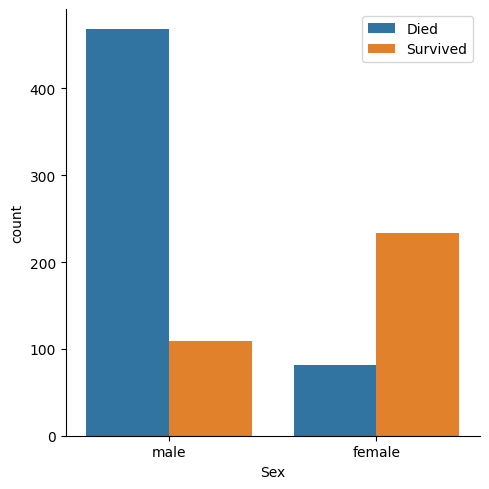

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Sex', hue = 'Survived', kind = 'count', data = titanic, legend = False)
plt.legend(['Died','Survived'])

<Axes: xlabel='Survived', ylabel='count'>

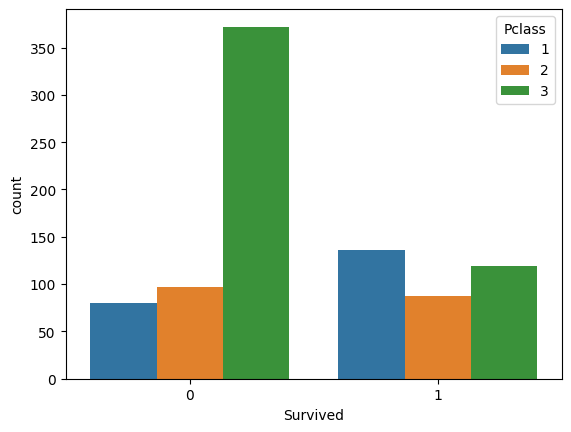

In [185]:
sns.countplot(x='Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

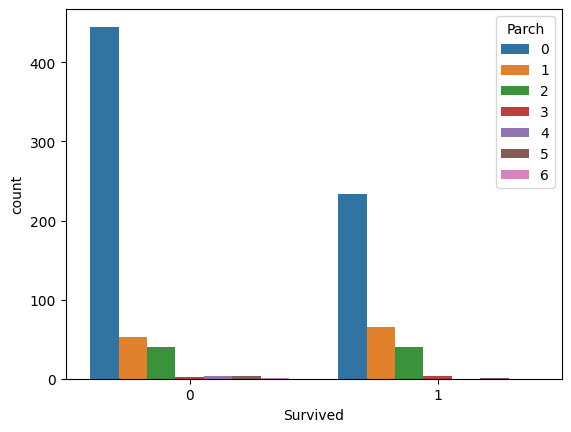

In [186]:
sns.countplot(x='Survived', hue = 'Parch', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

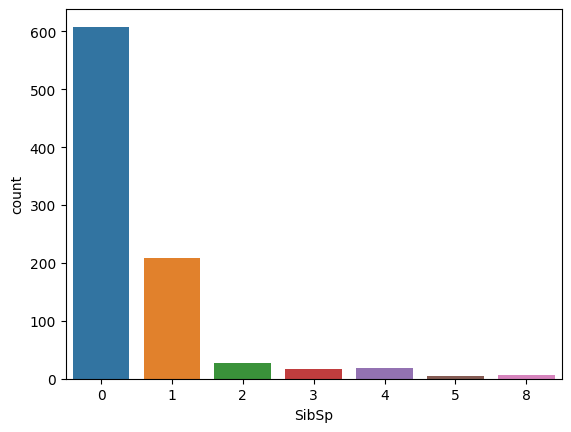

In [187]:
sns.countplot(x='SibSp', data= titanic) # most people were a lone

<Axes: xlabel='Sex', ylabel='Age'>

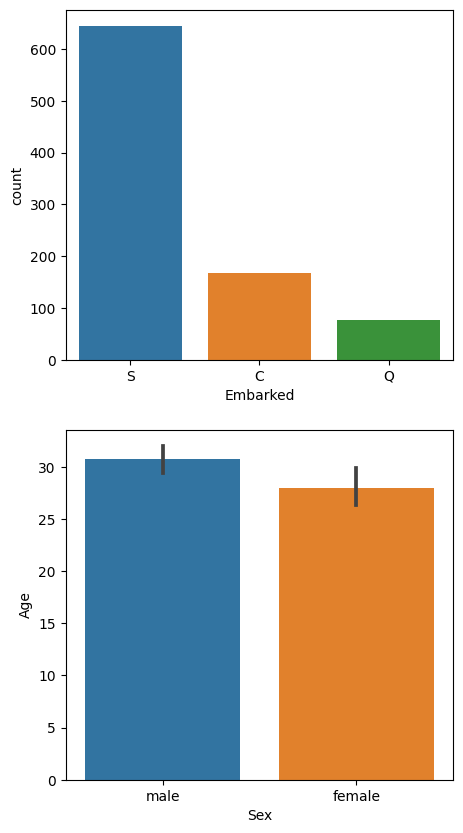

In [188]:
fig, axes = plt.subplots(2,1, figsize =(5,10))
sns.countplot(ax = axes[0], data = titanic, x = 'Embarked') # most people were from cherbourg
sns.barplot(ax = axes[1], data = titanic, x = 'Sex', y= 'Age') # mean and std of ages

Text(0, 0.5, 'Number of Passengers')

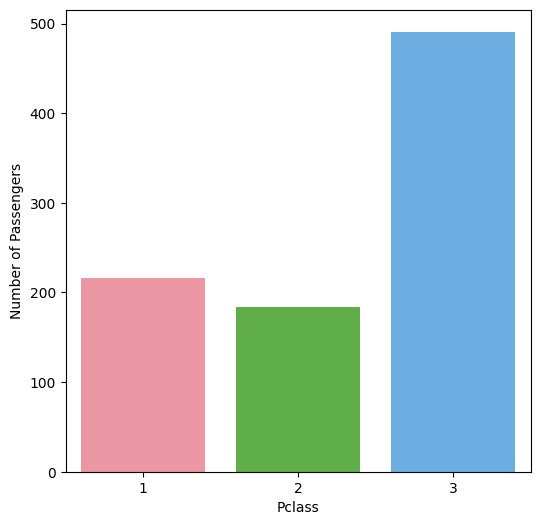

In [189]:
plt.figure(figsize = (6,6))
sns.set_palette(sns.color_palette(('red','lightpink')))
sns.countplot(data=titanic, x = 'Pclass')
plt.ylabel('Number of Passengers') ## most people were having lower class digits

Text(0, 0.5, 'proportion of survived')

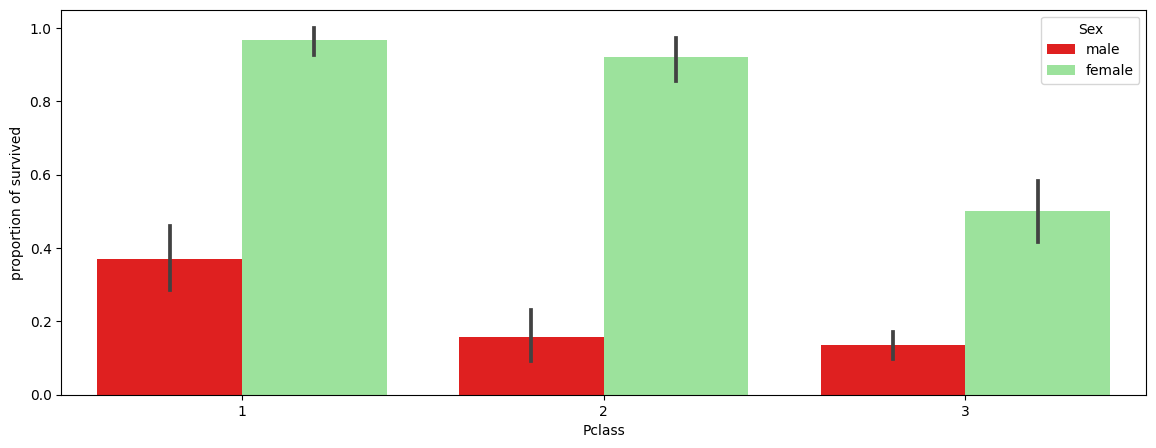

In [190]:
plt.figure(figsize = (14,5))
sns.set_palette(sns.color_palette(('red','lightgreen')))
sns.barplot(data=titanic, x = 'Pclass', hue = 'Sex', y = 'Survived')
plt.ylabel('proportion of survived')
# percentage of survival is higher for higher-class passengers

[Text(1, 0, 'Age'), Text(2, 0, 'Fare')]

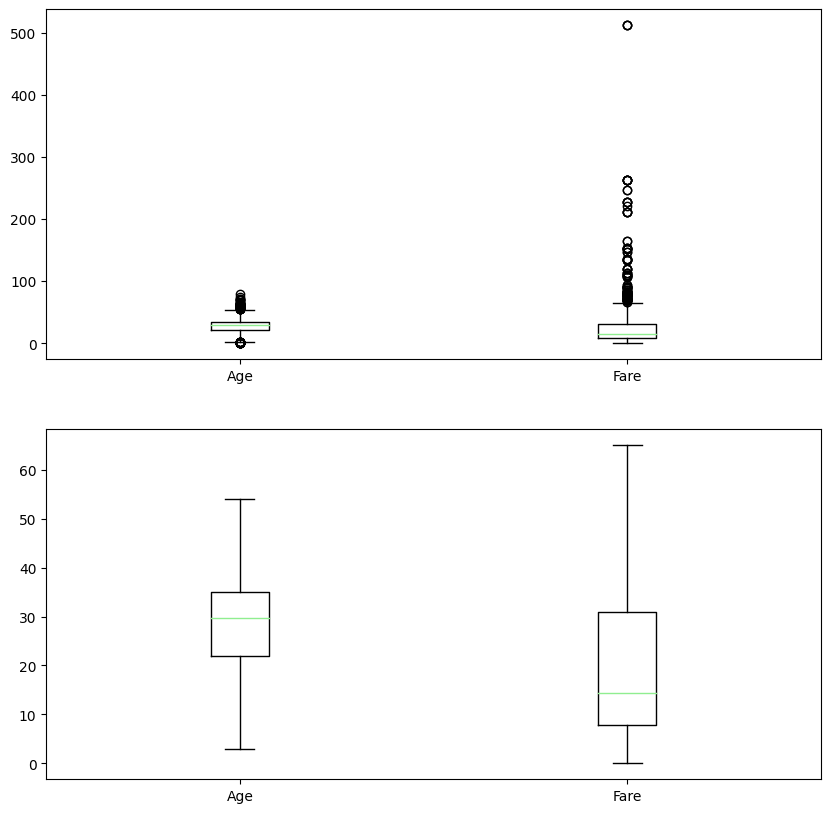

In [193]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
titanic['Age'].fillna(value = titanic['Age'].mean(), inplace = True)
ax[0].boxplot([titanic.Age, titanic.Fare])
ax[0].set_xticklabels(['Age','Fare'])
ax[1].boxplot([titanic.Age, titanic.Fare], showfliers = False)
ax[1].set_xticklabels(['Age','Fare'])

<Axes: xlabel='Age', ylabel='Pclass'>

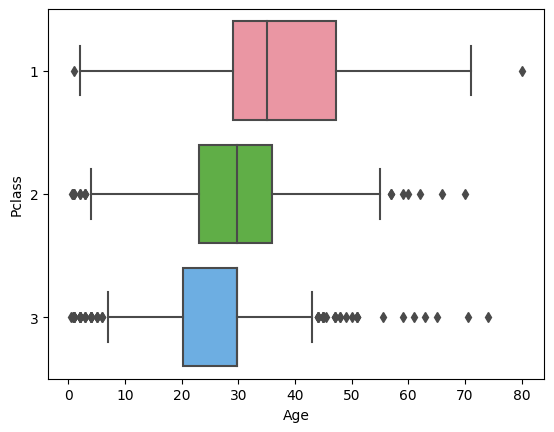

In [194]:
sns.boxplot(x = 'Age', y = 'Pclass', data = titanic, orient = 'h')
# lower class people were younger

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Male and Female Passenger Ages by Class')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


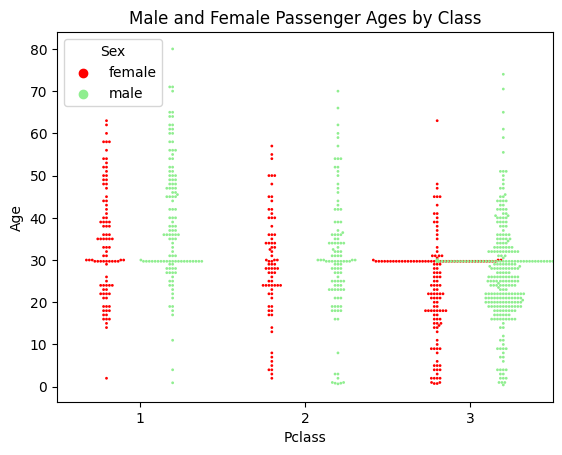

In [195]:
sns.swarmplot(x='Pclass', y='Age', data = titanic, hue = 'Sex', dodge = True, size = 2) # size = size of dots, dodge = two gender side by side
plt.title("Male and Female Passenger Ages by Class")


<Axes: xlabel='Age', ylabel='Count'>

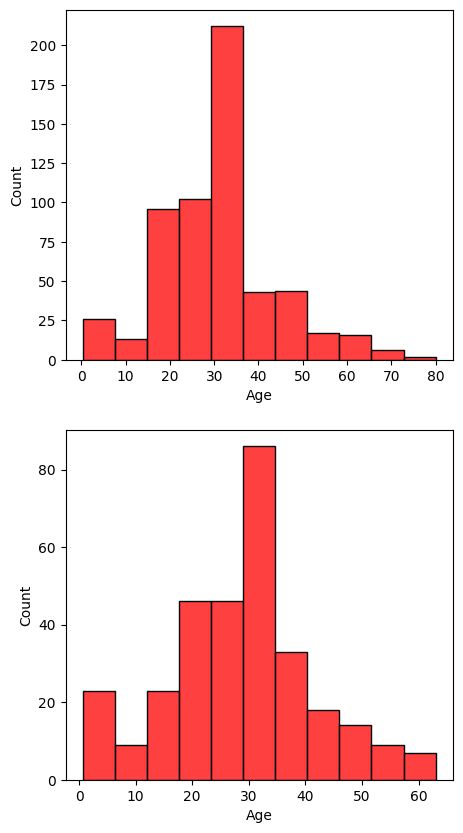

In [197]:
fig, axes = plt.subplots(2,1, figsize = (5,10))
male = titanic[titanic['Sex']=='male']
female = titanic[titanic['Sex']=='female']

sns.histplot(ax = axes[0], data= male.Age, bins = 11)
sns.histplot(ax = axes[1], data = female.Age, bins = 11)

<Axes: xlabel='Age', ylabel='Count'>

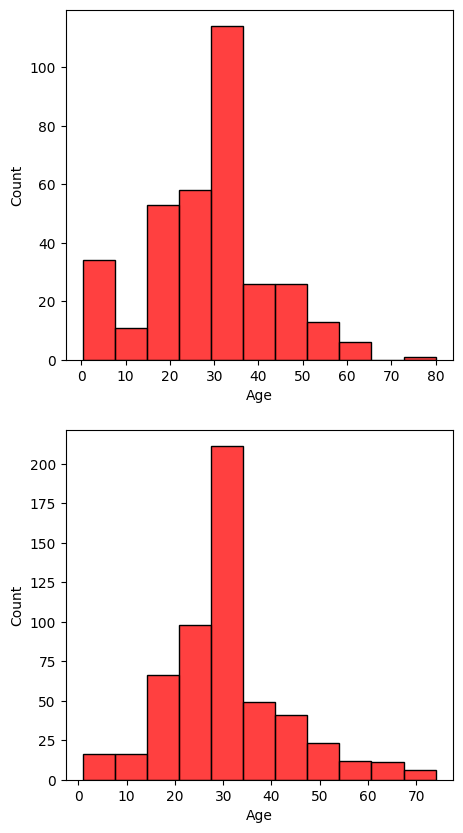

In [198]:
fig, axes = plt.subplots(2,1, figsize = (5,10))
survived = titanic[titanic['Survived']==1]
dead = titanic[titanic['Survived']==0]

sns.histplot(ax = axes[0], data= survived.Age, bins = 11)
sns.histplot(ax = axes[1], data = dead.Age, bins = 11)

([<matplotlib.patches.Wedge at 0x787e624c8640>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'Male'),
  Text(0.4919455057964525, -0.9838646346559433, 'Female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '65%'),
  Text(0.26833391225261044, -0.53665343708506, '35%')])

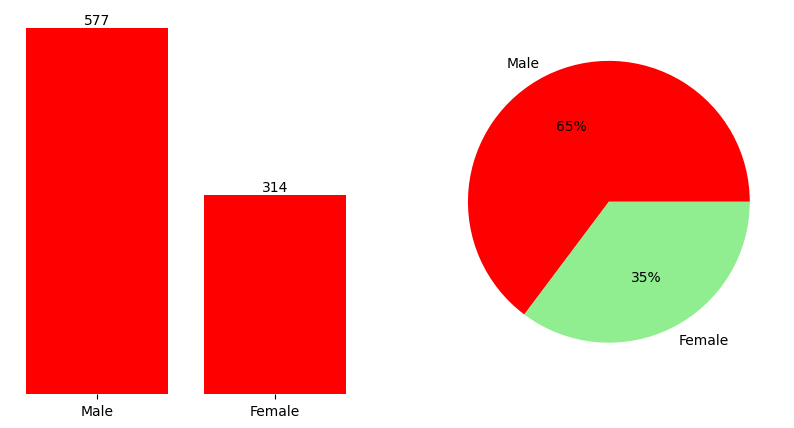

In [202]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
counts = [titanic[titanic.Sex == 'male'].shape[0], titanic[titanic.Sex=='female'].shape[0]]
labels = ['Male', 'Female']

r = axes[0].bar(labels,counts)
axes[0].bar_label(r)
axes[0].get_yaxis().set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].pie(counts, labels = labels, autopct= '%.0f%%')
